# Importing Libaries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and Explore Data


In [29]:
Data_points = np.genfromtxt("MultipleLR.csv" ,  delimiter= ',')
X_Data = Data_points[:,0:3]
Y_Data = Data_points[:,1]

# plt.scatter(X_Data , Y_Data)
# plt.show()



In [30]:
feature_length = X_Data.shape[1]

In [31]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , feature_length))  , axis = 1)



In [32]:
feture.shape

(25, 4)

# Generate Batches

In [33]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches



# Mini-Batch GD

In [34]:
def Mini_Batch_GD(feture , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold):
    
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Data_length = len(feture)
    Not_first_iter =0

    Jtheta = []
    theta_zero = []
    theta_one = []
    theta_two = []
    theta_three = []

    Max_no_iter = Max_no_iter
    Batch_Size = Batch_Size
    
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)

    for j in range(Max_no_iter):

        for i in range(len(feture_Mini)):
            Y= np.dot(theta ,feture_Mini[i].T)
            Error_mini = Y-Y_mini[i]

            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold):
                break
            Not_first_iter +=1

            theta_zero.append(theta[0][0])
            theta_one.append(theta[0][1])
            theta_two.append(theta[0][2])
            theta_three.append(theta[0][3])
           
            Jtheta.append(((1/2*len(feture_Mini))*(np.dot(Error_mini ,Error_mini.T)))[0])

            Gradt_mini = np.dot( Error_mini , feture_Mini[i])
            theta = theta - (alpha/len(feture_Mini))*Gradt_mini
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)//len(feture_Mini)))

    return theta[0] , theta_zero , theta_one , theta_two , theta_three , Jtheta 



In [35]:
theta , theta_zero , theta_one , theta_three, theta_four , Jtheta = Mini_Batch_GD(feture , Y_Data  , 0.00001 , 1000 , 5 , 5)

Number of Epochs 5


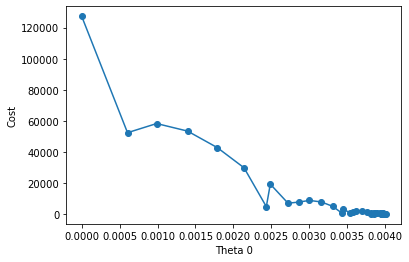

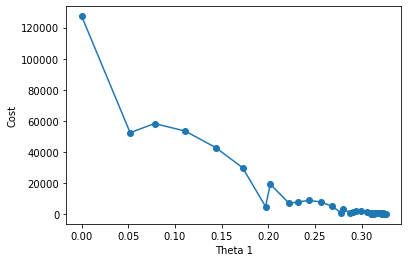

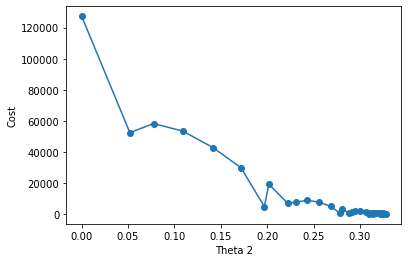

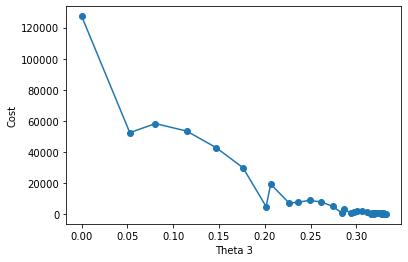

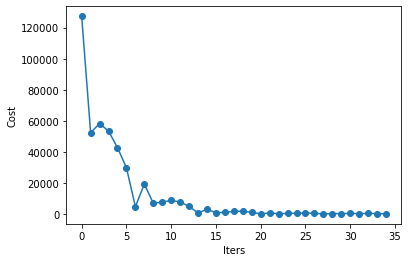

In [36]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_three , Jtheta , '-o')
plt.xlabel("Theta 2")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_four , Jtheta , '-o')
plt.xlabel("Theta 3")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adam Algorithm use MiniBatch

In [37]:
def Adam_MiniBatch(feture , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold , epslon , Beta_1 , Beta_2):
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Not_first_iter = 0
    
    Jtheta = []
    theta_zero = []
    theta_one = []
    theta_two = []
    theta_three = []
     
    Max_no_iter = Max_no_iter
    Mt = 0
    Vt = 0
    Mt_hat = 0
    Vt_hat = 0
    epslon = epslon
    Beta_1 = Beta_1
    Beta_2 = Beta_2

    Batch_Size = Batch_Size
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)
    Data_length = len(feture_Mini)
    
    for j in range(Max_no_iter):
        for i in range(len(feture_Mini)):
            Y= np.dot(theta ,feture_Mini[i].T)
            Error = Y - Y_mini[i]

            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold):
                break
            Not_first_iter +=1
            theta_zero.append(theta[0][0])
            theta_one.append(theta[0][1])
            theta_two.append(theta[0][2])
            theta_three.append(theta[0][3])
            Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))

            Gradt = (np.dot( Error , feture_Mini[i]) /Data_length)


            Mt = Beta_1*Mt + (1-Beta_1)*Gradt
            Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
            Mt_hat = Mt/(1-(Beta_1**(len(Jtheta))))
            Vt_hat = Vt/(1-(Beta_2**(len(Jtheta))))
            theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat
            
            
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)//len(feture_Mini)))

    return theta[0] , theta_zero , theta_one , theta_two , theta_three , Jtheta 

In [38]:
theta , theta_zero , theta_one , theta_three, theta_four , Jtheta = Adam_MiniBatch(feture , Y_Data  , 0.001 ,
                                                                                  1000 , 5 , 5 , 0.0001 , 0.9 , 0.9)

Number of Epochs 40


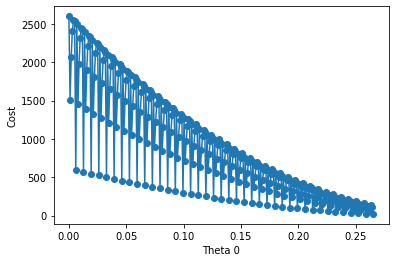

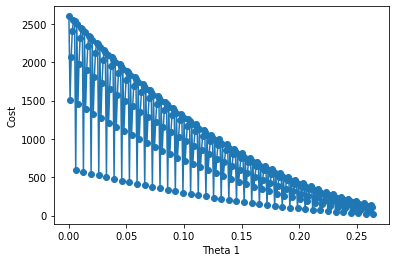

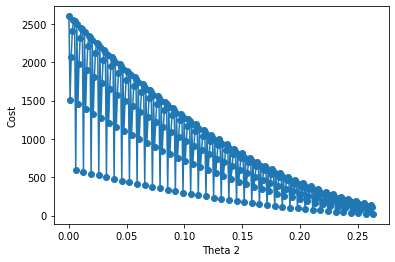

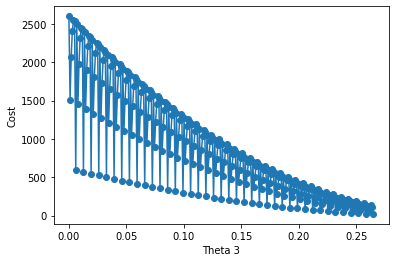

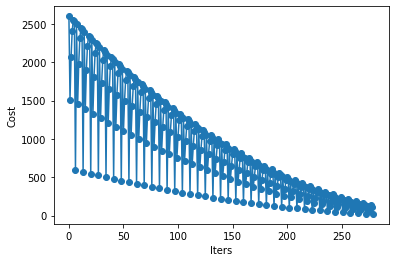

In [39]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_three , Jtheta , '-o')
plt.xlabel("Theta 2")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_four , Jtheta , '-o')
plt.xlabel("Theta 3")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Batch Momentum based MUltiVariable

In [40]:
def Momentum_multi(feture , Y_Data  , alpha , Max_no_iter , Gamma , stoping_therthold):
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Data_length = len(feture)

    Not_first_iter = 0
    Jtheta = []

    Max_no_iter = Max_no_iter
    Gamma = Gamma
    Vt = 0

    for i in range(Max_no_iter):
        Y= np.dot(theta ,feture.T)
        Error = Y- Y_Data

        if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < stoping_therthold:
                break
        Not_first_iter+=1

        Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))

        Gradt = (np.dot( Error , feture) /Data_length)

        Vt = Gamma*Vt + alpha*Gradt
        theta = theta - Vt
        
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)))
    
    return theta[0] , Jtheta

In [41]:
theta , Jtheta = Momentum_multi(feture , Y_Data  , 0.0001 , 1000 , 0.9 , 0.0001)
theta

Number of Epochs 216


array([ 0.00269567,  0.0183771 ,  0.98936473, -0.00750382])

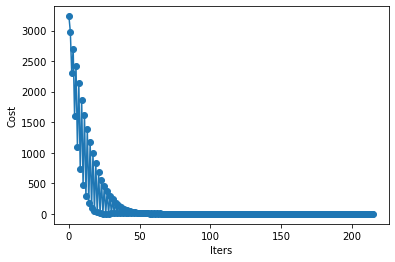

In [42]:
plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NAG Algorithm MUltiVariable

In [43]:
def NAG_multi(feture , Y_Data  , alpha , Max_no_iter , Gamma , stoping_therthold):
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Data_length = len(feture)

    Not_first_iter = 0

    Jtheta = []
    Max_no_iter = Max_no_iter

    Gamma = Gamma
    Vt = 0
    Theta_Tmp = np.zeros(feature_length).reshape(1,feature_length)

    for i in range(Max_no_iter):
        if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < stoping_therthold:
                break
        Not_first_iter+=1  

        Y= np.dot(theta ,feture.T)
        Error = Y - Y_Data
        Jtheta.append((1/(2*Data_length))*(np.dot(Error , Error.T)[0][0]))

        Y_tmp = np.dot(Theta_Tmp ,feture.T)
        Error_tmp = Y_tmp - Y_Data
        Gradt_Tmp = (np.dot( Error_tmp , feture) /Data_length)

        Theta_Tmp = theta - Gamma*Vt
        theta = Theta_Tmp - alpha*Gradt_Tmp
        Vt = Gamma*Vt + alpha*Gradt_Tmp
        
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)))
    
    return theta[0] , Jtheta  

In [44]:
theta , Jtheta = NAG_multi(feture , Y_Data  , 0.00001 , 1000 , 0.9 , 0.01)
theta

Number of Epochs 202


array([0.00329855, 0.25800123, 0.53833981, 0.19243732])

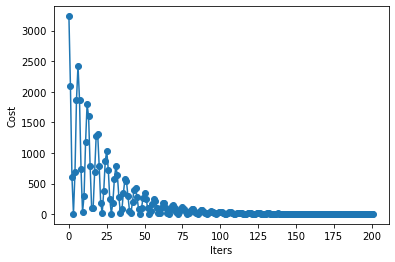

In [45]:
plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# RMSProp Algorithm MUltiVariable

In [46]:
def RMSProp_multi(feture , Y_Data  , alpha , Max_no_iter , epslon , Beta , stoping_therthold):    
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Data_length = len(feture)
    Not_first_iter = 0

    Jtheta = []
    Max_no_iter = Max_no_iter

    Vt = 0
    epslon = epslon
    Beta = Beta

    for i in range(Max_no_iter):
        Y= np.dot(theta ,feture.T)
        Error = (Y-Y_Data)

        if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < stoping_therthold:
                break
        Not_first_iter+=1 

        Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T )[0][0]))

        Gradt = (np.dot( Error , feture) /Data_length)

        Vt = Beta*Vt + (1-Beta)*np.square(Gradt)
        theta = theta - (alpha/np.sqrt(Vt+epslon))*Gradt
        
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)))

    return theta[0] , Jtheta

In [47]:
theta , Jtheta = RMSProp_multi(feture , Y_Data  , 0.1 , 1000 , 1e-8 , 0.2 , 0.1)

Number of Epochs 15


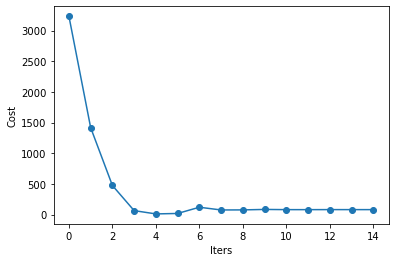

In [48]:
plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adagrad Algorithm MUltiVariable

In [49]:
def Adagrad_multi(feture , Y_Data  , alpha , Max_no_iter , epslon , stoping_therthold):  
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Data_length = len(feture)
    Not_first_iter = 0

    Jtheta = []
    Max_no_iter = Max_no_iter

    Vt = 0
    epslon = epslon

    for i in range(Max_no_iter):
        Y= np.dot(theta ,feture.T)
        Error = (Y-Y_Data)

        if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < stoping_therthold:
                break
        Not_first_iter+=1

        Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))

        Gradt = (np.dot( Error , feture) /Data_length)
        Vt = Vt + np.square(Gradt)
        theta = theta - (alpha/np.sqrt(Vt+epslon))*Gradt
        
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)))

    return theta[0] , Jtheta

In [50]:
theta , Jtheta = Adagrad_multi(feture , Y_Data  , 0.1 , 1000 , 1e-8 , 0.1)

Number of Epochs 22


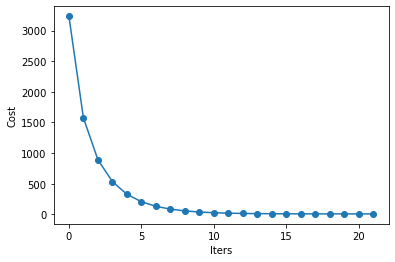

In [51]:
plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NADAM MULti MINIbatch

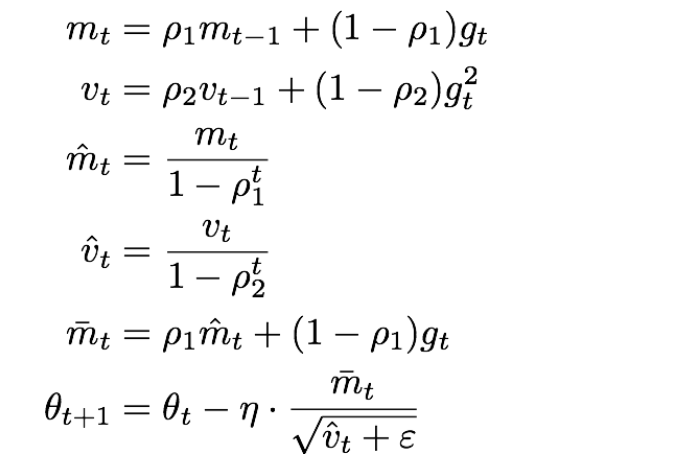

In [52]:
def NAdam(feture , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold , epslon , Beta_1 , Beta_2):
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Not_first_iter = 0
    
    Jtheta = []
     
    Max_no_iter = Max_no_iter
    Mt = 0
    Vt = 0
    Mt_hat = 0
    Vt_hat = 0
    epslon = epslon
    Beta_1 = Beta_1
    Beta_2 = Beta_2

    Batch_Size = Batch_Size
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)
    Data_length = len(feture_Mini)
    
    for j in range(Max_no_iter):
        for i in range(len(feture_Mini)):
            Y= np.dot(theta ,feture_Mini[i].T)
            Error = Y - Y_mini[i]

            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold):
                break
            Not_first_iter +=1

            Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))

            Gradt = (np.dot( Error , feture_Mini[i]) /Data_length)


            Mt = Beta_1*Mt + (1-Beta_1)*Gradt
            Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
            Mt_hat = Mt/(1-(Beta_1**(len(Jtheta))))
            Vt_hat = Vt/(1-(Beta_2**(len(Jtheta))))
            MT_dash = Beta_1*Mt_hat + (1-Beta_1)*Gradt
            theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*MT_dash
            
            
    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)//len(feture_Mini)))

    return theta[0] , Jtheta 

In [53]:
theta , Jtheta = NAdam(feture , Y_Data  , 0.001 ,1000 , 5 , 5 , 0.0001 , 0.9 , 0.9)

Number of Epochs 40


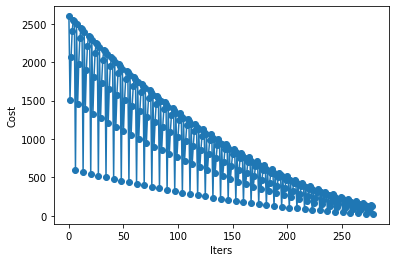

In [54]:
plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

<a href="https://medium.com/konvergen/modifying-adam-to-use-nesterov-accelerated-gradients-nesterov-accelerated-adaptive-moment-67154177e1fd">
Nadam from scratch</a>